In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/AInstein/Bioassay/processed_assay_mat_pct5.csv', header=0)

In [5]:
dataset.head()

,pubchem_AID,72.0,86.0,135.0,164.0,191.0,243.0,264.0,289.0,314.0,...,155561056.0,155561913.0,155568238.0,155568985.0,156009444.0,156009445.0,162662928.0,162673351.0,166176937.0,166628502.0
0,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,155,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
num_aid = len(dataset.pubchem_AID.unique())
num_cid = len(dataset.columns.unique()) - 1

In [7]:
num_aid, num_cid

(1200, 1030)

In [8]:
train, test = train_test_split(dataset, test_size=0.2)

In [ ]:
train.head()

,pubchem_AID,72.0,86.0,135.0,164.0,191.0,243.0,264.0,289.0,314.0,...,155561056.0,155561913.0,155568238.0,155568985.0,156009444.0,156009445.0,162662928.0,162673351.0,166176937.0,166628502.0
74,302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
736,1793937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
653,1446910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
534,1143946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test.head()

,pubchem_AID,72.0,86.0,135.0,164.0,191.0,243.0,264.0,289.0,314.0,...,155561056.0,155561913.0,155568238.0,155568985.0,156009444.0,156009445.0,162662928.0,162673351.0,166176937.0,166628502.0
897,1794112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
291,614062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
828,1794035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
1031,1794253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
535,1145681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Generalized Matrix Factorization (GMF)

## Matrix Factorization

In [10]:
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, Dot
from keras.utils import model_to_dot
from IPython.display import SVG

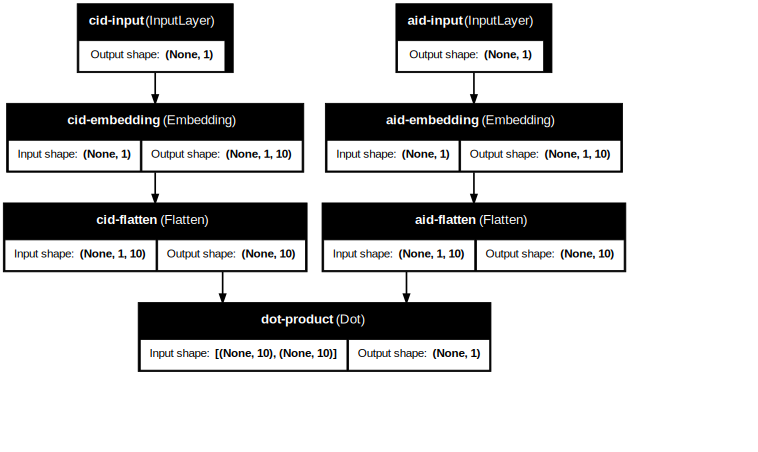

In [11]:
latent_dim = 10

cid_input = Input(shape=[1],name='cid-input')
cid_embedding = Embedding(num_cid + 1, latent_dim, name='cid-embedding')(cid_input)
cid_vec = Flatten(name='cid-flatten')(cid_embedding)

aid_input = Input(shape=[1],name='aid-input')
aid_embedding = Embedding(num_aid + 1, latent_dim, name='aid-embedding')(aid_input)
aid_vec = Flatten(name='aid-flatten')(aid_embedding)

prod = Dot(axes=1, name='dot-product')([cid_vec, aid_vec])

model = Model([aid_input, cid_input], prod)
model.compile('adam', 'mean_squared_error')

dot = model_to_dot(model, show_shapes=True, dpi=60)

SVG(dot.create(prog='dot', format='svg'))

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ cid-input (InputLayer)    │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ aid-input (InputLayer)    │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cid-embedding (Embedding) │ (None, 1, 10)          │         10,310 │ cid-input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ aid-embedding (Embedding) │ (None, 1, 10)          │         12,010 │ aid-input[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cid-flatten (Flatten)     │ (None, 10)             │              0 │ cid-embedding[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ aid-flatten (Flatten)     │ (None, 10)             │              0 │ aid-embedding[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot-product (Dot)         │ (None, 1)              │              0 │ cid-flatten[0][0],     │
│                           │                        │                │ aid-flatten[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 22,320 (87.19 KB)

 Trainable params: 22,320 (87.19 KB)

 Non-trainable params: 0 (0.00 B)